# The following program demonstrates the classification of emial into spam or ham using NLTK and ML algorithms

In [40]:
#importing the required libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

# Reading the Data

In [42]:
#reading the data(CSV file)
df=pd.read_csv("spam.csv",encoding='latin1')
df.head(5)

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df['length']=df['text'].apply(len)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
#printing the size of the dataset
df.shape

(5572, 3)

In [46]:
#getting feature names
df.columns

Index(['type', 'text', 'length'], dtype='object')

In [47]:
#checking the duplicates and remove them
df.drop_duplicates(inplace=True)
df.shape

(5169, 3)

In [48]:
df.describe()

,length
count,5169.000000
mean,78.977945
std,58.236293
min,2.000000
25%,36.000000
50%,60.000000
75%,117.000000
max,910.000000


In [49]:
df.length.describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64

In [50]:
df[df['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [51]:
df["type"].value_counts()

ham     4516
spam     653
Name: type, dtype: int64

In [52]:
#show the number of missing data(NAN,NaN,na) for each column
df.isnull().sum()

type      0
text      0
length    0
dtype: int64

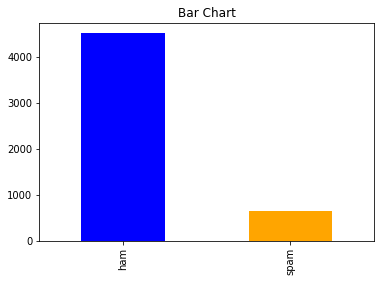

In [53]:
count_cls=pd.value_counts(df['type'],sort=True)
count_cls.plot(kind='bar', color=["blue","orange"])
plt.title('Bar Chart')
plt.show()

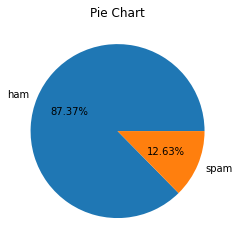

In [54]:
count_cls.plot(kind= 'pie', autopct='%1.2f%%')

plt.title('Pie Chart')
plt.ylabel('')
plt.show()

# Message Preprocessing

In [55]:
#function to tokenize each and every word
def tokenizer(text):
    tokenized=nltk.word_tokenize(text)
    tokenized=' '.join(tokenized)
    tokenized=tokenized.replace('n\'t','not')
    return tokenized
                

In [56]:
nltk.download('stopwords')
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kirti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
#creating a function to process punctuation and stopwords in the text data
def process_stop_punc(text):
    #remove punctuations
    #remove stopwords
    #return a list of clen text words
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 
    #nopunc.split is use to get the tokens sepaately
    
    return clean_words

In [58]:
#functions to convert words into single form i.e. converting plural to singular and past ,past continuous to present
def stemming(List):
    stem_obj=nltk.stem.PorterStemmer() # portstemmer-oldest and effiency is good
    List=[stem_obj.stem(i) for i in List]
    message=' '.join(List)
    return message

In [59]:
#function to compile each and every operation
def process(text):
    return stemming(process_stop_punc(tokenizer(text)))

In [60]:
#show the tokenization
df['text'].head().apply(process)

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: text, dtype: object

# Vectorizing the words

In [61]:
#convert a collection of data to matrix of tokens using tf-idf vectorizer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
message=TfidfVectorizer(analyzer=process).fit_transform(df['text'])

In [62]:
#getting the shape of message
message.shape

(5169, 61)

In [63]:
#using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
message1=CountVectorizer(analyzer=process).fit_transform(df['text'])


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

x=cv.fit(df['text'])
x.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

# Splitting data into training tesing set

In [65]:
#splitting the data into 80:20 train test ratio for dataset vectorized using tf-idfvectorizer
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(message,df['type'],test_size=0.2,random_state=0)

In [66]:
print(X_test.shape)
print("\n")
print(y_test.shape)

(1034, 61)


(1034,)


In [67]:
print(X_test)

  (0, 7)	0.36305794470957053
  (0, 18)	0.14422677770922931
  (0, 9)	0.1646937170041491
  (0, 34)	0.14144518797329989
  (0, 6)	0.3396968579661826
  (0, 1)	0.3203534096999737
  (0, 35)	0.09719075631146003
  (0, 29)	0.068006924430211
  (0, 16)	0.1025141878836897
  (0, 14)	0.14718910697763082
  (0, 33)	0.0853503142051478
  (0, 15)	0.056394149739173574
  (0, 11)	0.23203429316704538
  (0, 30)	0.2384219233189333
  (0, 26)	0.08266343166259318
  (0, 24)	0.18917001288700894
  (0, 31)	0.0755481664360632
  (0, 0)	0.520867369594567
  (0, 25)	0.2982025067942331
  (0, 17)	0.07929847166825754
  (1, 18)	0.140497234239295
  (1, 5)	0.10608354408226665
  (1, 34)	0.5511502932352941
  (1, 35)	0.12623668246419428
  (1, 29)	0.1324966825623528
  :	:
  (1032, 33)	0.09747226492017233
  (1032, 15)	0.1932107299609586
  (1032, 12)	0.22006142812078988
  (1032, 22)	0.22480605342339754
  (1032, 11)	0.3312364503981385
  (1032, 13)	0.17071475729799312
  (1032, 30)	0.2722839990566598
  (1032, 19)	0.2117280963203821
  (10

In [68]:
print(y_test)

1851    ham
2375    ham
2743    ham
3324    ham
3995    ham
       ... 
2237    ham
4368    ham
3046    ham
4263    ham
2674    ham
Name: type, Length: 1034, dtype: object


In [69]:
#splitting the data into 80:20 train test ratio for dataset vectorized using countvectorizer
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(message1,df['type'],test_size=0.2,random_state=0)

In [70]:
print(X_test1)


  (0, 17)	1
  (0, 25)	5
  (0, 0)	10
  (0, 31)	1
  (0, 24)	3
  (0, 26)	1
  (0, 30)	4
  (0, 11)	4
  (0, 15)	1
  (0, 33)	1
  (0, 14)	2
  (0, 16)	1
  (0, 29)	1
  (0, 35)	1
  (0, 1)	2
  (0, 6)	2
  (0, 34)	1
  (0, 9)	1
  (0, 18)	2
  (0, 7)	2
  (1, 17)	1
  (1, 25)	3
  (1, 0)	16
  (1, 31)	6
  (1, 28)	6
  :	:
  (1032, 24)	3
  (1032, 19)	3
  (1032, 30)	4
  (1032, 13)	2
  (1032, 11)	5
  (1032, 22)	3
  (1032, 12)	2
  (1032, 15)	3
  (1032, 33)	1
  (1032, 14)	1
  (1032, 16)	1
  (1032, 21)	1
  (1032, 29)	4
  (1033, 17)	1
  (1033, 25)	3
  (1033, 0)	3
  (1033, 24)	1
  (1033, 19)	1
  (1033, 30)	1
  (1033, 13)	1
  (1033, 12)	1
  (1033, 14)	1
  (1033, 16)	1
  (1033, 23)	1
  (1033, 7)	1


In [71]:
print(y_test1)

1851    ham
2375    ham
2743    ham
3324    ham
3995    ham
       ... 
2237    ham
4368    ham
3046    ham
4263    ham
2674    ham
Name: type, Length: 1034, dtype: object


# Feeding Data and classification report of Naive Bayes classifier 

In [72]:
#creating and training the naive bayes classifier for for dataset vectorized using tf-idfvectorizer
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train,y_train)

In [73]:
print(classifier.predict(X_train))

print()
print(y_train.values)


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [74]:
#evaluate the model and training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print('confusion Matrix:\n',confusion_matrix(y_train,pred))
print()
print(' training accuracy score:\n',accuracy_score(y_train,pred))


              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      3631
        spam       0.95      0.76      0.84       504

    accuracy                           0.97      4135
   macro avg       0.96      0.88      0.91      4135
weighted avg       0.96      0.97      0.96      4135


confusion Matrix:
 [[3611   20]
 [ 123  381]]

 training accuracy score:
 0.9654171704957678


In [75]:
#printing the predictions
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('confusion Matrix:\n',confusion_matrix(y_test,pred))
print()
print('testing accuracy score:\n',accuracy_score(y_test,pred))


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       885
        spam       0.99      0.73      0.84       149

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034


confusion Matrix:
 [[884   1]
 [ 40 109]]

testing accuracy score:
 0.960348162475822


In [76]:
#creating and training the naive bayes classifier for for dataset vectorized using countvectorizer
from sklearn.naive_bayes import MultinomialNB
classifier1=MultinomialNB().fit(X_train1,y_train1)

In [77]:
#evaluate the model and training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred1=classifier1.predict(X_train1)
print(classification_report(y_train1,pred1))
print()
print('confusion Matrix:\n',confusion_matrix(y_train1,pred1))
print()
print(' training accuracy score:\n',accuracy_score(y_train1,pred1))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      3631
        spam       0.88      0.86      0.87       504

    accuracy                           0.97      4135
   macro avg       0.93      0.92      0.92      4135
weighted avg       0.97      0.97      0.97      4135


confusion Matrix:
 [[3570   61]
 [  73  431]]

 training accuracy score:
 0.9675937122128174


In [78]:
#prediction from the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred1_test=classifier1.predict(X_test1)
print(classification_report(y_test1,pred1_test))
print()
print('confusion Matrix:\n',confusion_matrix(y_test1,pred1_test))
print()
print('testing accuracy score:\n',accuracy_score(y_test1,pred1_test))


              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       885
        spam       0.90      0.82      0.86       149

    accuracy                           0.96      1034
   macro avg       0.93      0.90      0.92      1034
weighted avg       0.96      0.96      0.96      1034


confusion Matrix:
 [[871  14]
 [ 27 122]]

testing accuracy score:
 0.960348162475822


# Using support-vector-machine Algorithm

In [96]:
#prediction using LinearSVC and GridsearchCV and tokens obtained fron TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100]}
grid=GridSearchCV(LinearSVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-p

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [97]:
#finding best C for best parameter
print(grid.best_params_)

{'C': 10}


In [98]:
#finding best accuracy
print(grid.best_score_)

0.9779927448609431


In [99]:
#prediction of test data
pred2=grid.predict(X_test)

In [100]:
#evaluate the model and training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred2))
print()
print('confusion Matrix:\n',confusion_matrix(y_test,pred2))
print()
print('accuracy score:\n',accuracy_score(y_test,pred2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       885
        spam       0.98      0.85      0.91       149

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


confusion Matrix:
 [[883   2]
 [ 23 126]]

accuracy score:
 0.9758220502901354


In [101]:
#prediction using LinearSVC and GridsearchCV and tokens obtained fron CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100]}
grid=GridSearchCV(LinearSVC(),param_grid,refit=True)
grid.fit(X_train1,y_train1)

c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-p

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [102]:
#finding best C for best parameter
print(grid.best_params_)

{'C': 1}


In [103]:
#finding best accuracy
print(grid.best_score_)

0.9794437726723094


In [104]:
#training teh dataset
grid.fit(X_train1,y_train1)

c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kirti\appdata\local\programs\python\python37\lib\site-p

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [105]:
#prediction of test data
pred3=grid.predict(X_test1)

In [106]:
#evaluate the model and training dataset
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test1,pred3))
print()
print('confusion Matrix:\n',confusion_matrix(y_test1,pred3))
print()
print('accuracy score:\n',accuracy_score(y_test1,pred3))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       885
        spam       0.98      0.86      0.92       149

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


confusion Matrix:
 [[883   2]
 [ 21 128]]

accuracy score:
 0.9777562862669246
